In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('fuel.csv')

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# Exploration
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [13]:
# Slice DataFrame
df_new = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

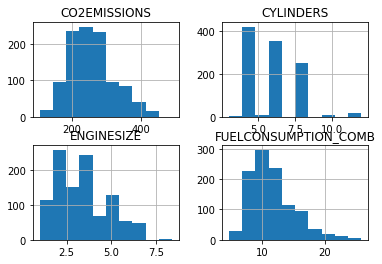

In [14]:
df_new.hist()
plt.show()

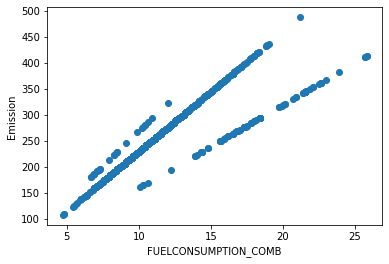

In [19]:
plt.scatter(df_new['FUELCONSUMPTION_COMB'],df_new['CO2EMISSIONS'])
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

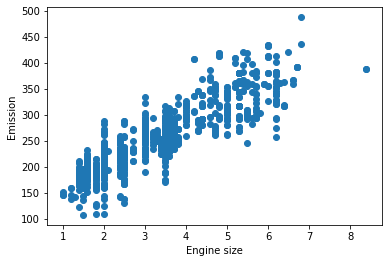

In [21]:
plt.scatter(df_new.ENGINESIZE, df_new.CO2EMISSIONS)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

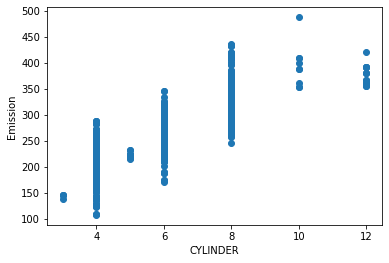

In [24]:
# Plot cilinder vs emission
plt.scatter(df_new.CYLINDERS, df_new.CO2EMISSIONS)
plt.xlabel("CYLINDER")
plt.ylabel("Emission")
plt.show()

In [ ]:
# Split Train Test

In [75]:
msk = np.random.rand(len(df)) < 0.8
msk

array([ True,  True, False, ...,  True, False,  True])

In [152]:
train = df_new[msk]
test = df_new[~msk]

train_x = train[['ENGINESIZE']]
train_y = train[['CO2EMISSIONS']]

test_x = test[['ENGINESIZE']]
test_y = test[['CO2EMISSIONS']]

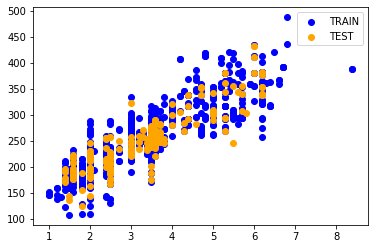

In [153]:
plt.scatter(train_x, train_y, color = 'Blue', label = 'TRAIN')
plt.scatter(test_x, test_y, color = 'Orange', label = 'TEST')
plt.legend()
plt.show()

In [154]:
from sklearn.linear_model import LinearRegression

In [155]:
ln = LinearRegression()

In [156]:
ln.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [157]:
print ('Coefficients: ', ln.coef_)
print ('Intercept: ',ln.intercept_)

Coefficients:  [[39.03909368]]
Intercept:  [126.56843993]


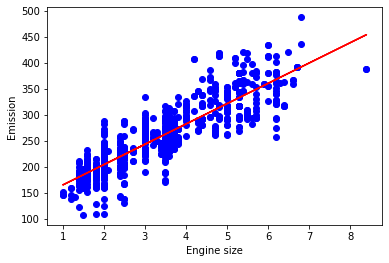

In [158]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, ln.coef_[0][0]*train_x + ln.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [159]:
# Model Evaluation

In [173]:
from sklearn.metrics import r2_score

In [174]:
test_yhat = ln.predict(test_x)

In [177]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_yhat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_yhat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_yhat , test_y) )

Mean absolute error: 22.34
Residual sum of squares (MSE): 815.33
R2-score: 0.70
